# <font color='#2F4F4F'>AfterWork Data Science: Text Classification with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

Build a text classification model that classifies a given text input as written in english or in dutch.

### b) Defining the Metric for Success

Build a classification model with an accuracy of score of atleast 85%.

### c) Understanding the Context 

You work as a Computational Linguist for a Global firm, collaborating with Engineers and
Researchers in Assistant and Research & Machine Intelligence to develop language
understanding models that improve our ability to understand and generate natural
language.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings 
* Recommendation
* Challenges


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [22]:
# Importing the required libraries
# ---
# 
import pandas as pd # library for data manipulation
import numpy as np  # librariy for scientific computations
import re           # regex library to perform text preprocessing
import string       # library to work with strings
import nltk         # library for natural language processing
import scipy        # scientific computing 
import seaborn as sns # library for data visualisation

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

# Library for Stop words
!pip3 install wordninja
!pip3 install textblob
import wordninja 
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Library for Lemmatization
nltk.download('wordnet')
from textblob import Word

# Library for Noun count
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Library for TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 

# Library for metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
# Custom Functions
# ---
#

# Avg. words
def avg_word(sentence):
  words = sentence.split()
  try:
    z = (sum(len(word) for word in words)/len(words))
  except ZeroDivisionError:
    z = 0 
  return z

# Noun count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

# Subjectivity 
def get_subjectivity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

# Polarity
def get_polarity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [24]:
# loading and previewing the dataset
df = pd.read_csv('http://bit.ly/EnglishNDutchDs') 
df.sample(5)

,text,label
740,In had ze een korte verhouding met de Perzische sjah Mohammed Reza Pahlavi maar religieuze,nl
703,"during the production and release of his 2014 album, Kärlekslåtar. The album would go on",en
724,Naast gele eendjes zijn er ook vele varianten zoals eenden in allerlei kleuren of eenden,nl
374,"hij York. zijn werd officieel in in Staten. de veranderde Son, op het Trump Organization.",nl
1058,"Kenmerkend een van zekere natte, is open heeft, kalkrijk zure, op zandige vegetatieve moerasvegetaties), leemgrond.",nl


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [25]:
# check dataset shape
df.shape

(1069, 2)

Our dataset has 1069 records and 2 variables.

In [26]:
# preview variable datatypes
df.dtypes

text     object
label    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


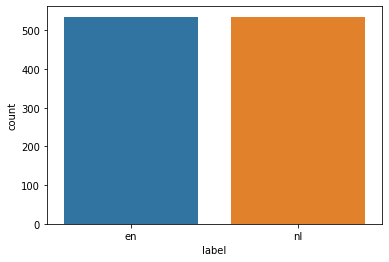

In [27]:
# plotting the distribution of label
# ---
#
sns.countplot(df['label']);

In [28]:
# investigating the label distribution
df['label'].value_counts()

nl    535
en    534
Name: label, dtype: int64

From above, we can see that our dataset is unbalanced thus we will need to sample equal no. of records for each label during data preparation to make a balanced dataset.

## <font color='#2F4F4F'>Step 4. Data Preparation</font>

### <font color='#2F4F4F'>3.1 Data Cleaning</font>

In [29]:
# check for duplicates
df.duplicated().sum()

10

There are 10 duplicates. We will need to drop these.

In [30]:
# check for missing values
df.isna().sum()

text     0
label    0
dtype: int64

No missing values found. 

In [31]:
# dropping our duplicates
df = df.drop_duplicates()
df.shape

(1059, 2)

In [32]:
# What values are in our label variable?
# ---
#
df.label.unique()

array(['en', 'nl'], dtype=object)

In [33]:
# sampling text with en 
df_en = df[df["label"] == 'en'] 
df_en = df_en.sample(200)

# sampling text with nl 
df_nl = df[df["label"] == 'nl'] 
df_nl = df_nl.sample(200)

# combining our dataframes
df = pd.concat([df_en, df_nl])
df.head()

,text,label
177,norðrmaðr and meaning would student English is as as forms Buskerud of and theory first,en
1023,The film stars an ensemble cast led by Paul Walker Matt Dillon Brendan Fraser Vincent,en
133,"powers, and £22 2011.[145] local the billion Khan, (£14.7 The capital.[143][144] out London of of",en
918,This makes it impractical to construct a permanent station at the North Pole unlike the,en
204,by residual of This the the such voltage were kV. a which observed discharge ionization,en


In [34]:
# investigating the label distribution
df['label'].value_counts()

en    200
nl    200
Name: label, dtype: int64

We now have our balanced dataset. 

In [35]:
df.head()

,text,label
177,norðrmaðr and meaning would student English is as as forms Buskerud of and theory first,en
1023,The film stars an ensemble cast led by Paul Walker Matt Dillon Brendan Fraser Vincent,en
133,"powers, and £22 2011.[145] local the billion Khan, (£14.7 The capital.[143][144] out London of of",en
918,This makes it impractical to construct a permanent station at the North Pole unlike the,en
204,by residual of This the the such voltage were kV. a which observed discharge ionization,en


### <font color='#2F4F4F'> 3.2 Text Cleaning</font>

In [36]:
# We will create a custom function that will contain all the text cleaning 
# techniques. We can then reuse the same function for cleaning new data
# without rewriting the code.
# ---
# 
def text_cleaning(tweet):
  # Removing url/links
  df['text'] = df.text.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+','', str(x)))

  # Removing @ and # characters and replacing them with space
  df['text'] = df.text.str.replace('#',' ')
  df['text'] = df.text.str.replace('@',' ') 

  # Conversion to lowercase 
  df['text'] = df.text.apply(lambda x: " ".join(x.lower() for x in x.split()))

  # Removing punctuation characters
  df['text'] = df.text.str.replace('[^\w\s]','')

  # Removing stop words
  df['text'] = df.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # Lemmatization
  df['text'] = df.text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [37]:
# Applying the text_cleaning function to our dataframe.
# ---
# NB: This process may take 5-10 min.
# ---
#
df['text'].apply(text_cleaning)
df.sample(5)

,text,label
747,een voorbeeld van een atoom de propositielogica pde volgende formule uit de propositielogica,nl
882,foot wingspan relatively small triangular sternum flight muscle attached,en
1046,het vormingswerk wereld sociaalcultureel kaderde en landbouw zocht de een op,nl
905,tour de france th edition tour de france taking place,en
224,diverse dawning indoeuropean human gradually second declining religious untouchability exported,en


### <font color='#2F4F4F'> 3.3 Feature Engineering</font>

In [38]:
# We will create a custom function that will contain all the 
# feature engineering techniques. We can then use this function 
# for cleaning new data. 
# ---
#
def feature_engineering(text):
  # Length of tweet
  df['length_of_tweet'] = df.text.str.len()

  # Word count 
  df['word_count'] = df.text.apply(lambda x: len(str(x).split(" ")))

  # Word density (Average no. of words / tweet)
  df['avg_word_length'] = df.text.apply(lambda x: avg_word(x)) 
  
  # Noun Count
  df['noun_count'] = df.text.apply(lambda x: pos_check(x, 'noun'))

  # Verb Count
  df['verb_count'] = df.text.apply(lambda x: pos_check(x, 'verb'))

  # Adjective Count / Tweet
  df['adj_count'] = df.text.apply(lambda x: pos_check(x, 'adj'))

  # Adverb Count / Tweet
  df['adv_count'] = df.text.apply(lambda x: pos_check(x, 'adv'))

  # Pronoun 
  df['pron_count'] = df.text.apply(lambda x: pos_check(x, 'pron'))

  # Subjectivity 
  df['subjectivity'] = df.text.apply(get_subjectivity)

  # Polarity
  df['polarity'] = df.text.apply(get_polarity)

In [39]:
# Applying the custom feature engineering function to our dataframe.
# This process may take 2-5 min.
# ---
#
df.text.apply(feature_engineering)
df.sample(5)

,text,label,length_of_tweet,word_count,avg_word_length,noun_count,verb_count,adj_count,adv_count,pron_count,subjectivity,polarity
850,de hoofdopdracht het vrijwaren van de eerlijke mededinging op de europese markten samenwerking,nl,94,13,6.307692,2,2,1,0,0,0.0,0.0
276,op sloeg andere en wraak kroonsteen einde gearresteerd verliefd degene ze bond parijs opdracht,nl,94,14,5.785714,9,1,2,1,0,0.0,0.0
349,bij bol met zijn spring experimenteerde elektriciteitsbedrijf geldgebrek het de investeringen te plaatselijke ook,nl,113,14,7.142857,11,1,1,0,0,0.0,0.0
972,according beardsley big deal u neither one,en,42,7,5.142857,2,1,1,0,0,0.0,0.0
243,india devastation leading indian regional soldier strong using law setting many,en,79,11,6.272727,3,3,5,0,0,0.0,0.0


In [40]:
# Performing further feature engineering techniques
# ---
#
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Construction: Word Level N-Gram TF-IDF Feature 
# ---
#
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
df_word_vect = tfidf.fit_transform(df.text) 

# Feature Construction: Character Level N-Gram TF-IDF 
# ---
#
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char', ngram_range=(1,3),  stop_words= 'english')
df_char_vect = tfidf.fit_transform(df.text)


In [41]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables 
# ---
#  
X_metadata = np.array(df[df.columns.difference(['label', 'text'])])
X_metadata

array([[ 2.        ,  1.        ,  6.44444444, ...,  0.        ,
         1.        ,  9.        ],
       [ 1.        ,  0.        ,  5.25      , ...,  0.        ,
         1.        , 12.        ],
       [ 1.        ,  0.        ,  5.77777778, ...,  0.        ,
         0.        ,  9.        ],
       ...,
       [ 3.        ,  0.        ,  5.92307692, ...,  0.        ,
         1.        , 13.        ],
       [ 4.        ,  0.        ,  6.57142857, ...,  0.        ,
         3.        , 14.        ],
       [ 3.        ,  1.        ,  5.38461538, ...,  0.        ,
         2.        , 13.        ]])

In [43]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
X = scipy.sparse.hstack([df_word_vect, df_char_vect, X_metadata])
X

<400x2010 sparse matrix of type '<class 'numpy.float64'>'
	with 52440 stored elements in COOrdinate format>

In [46]:
df['label']

177     en
1023    en
133     en
918     en
204     en
        ..
414     nl
766     nl
836     nl
848     nl
724     nl
Name: label, Length: 400, dtype: object

In [47]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---  
#
y = np.array(df['label'].replace(['en', 'nl'], ['1','0']))
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

We will carry out 10 types of classification analysis, namely:
1.  Logistic Regression
3.  Decision Trees Classification
4.  Support Vector Machine (SVM) Classification
5. K-Nearest Neighbors (KNN) Classification
6.  Gaussian Naive Bayes (NB) Classification
7.  BaggingClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. GradientBoostingClassifier

We use their default parameters then compare the different classification models to assess the best performing one(s). 

In [48]:
# splitting into 80-20 train-test sets
# ---
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# loading our classification libraries
# ---
#
from sklearn.linear_model import LogisticRegression      
from sklearn.tree import DecisionTreeClassifier          
from sklearn.svm import SVC                             
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


# instantiating our classifiers
# ---
#
LogisticRegression=LogisticRegression()
DecisionTreeClassifier = DecisionTreeClassifier()
SupportVectorMachine = SVC()
KNN = KNeighborsClassifier()
Gaussian = GaussianNB()
BaggingClassifier=BaggingClassifier()
RandomForestClassifier=RandomForestClassifier()
AdaBoostClassifier=AdaBoostClassifier()
GradientBoostingClassifier=GradientBoostingClassifier()

# fitting our classifiers to the training data
# ---
#
LogisticRegression.fit(X_train, y_train)
DecisionTreeClassifier.fit(X_train, y_train)
SupportVectorMachine.fit(X_train, y_train)
KNN.fit(X_train, y_train)
Gaussian.fit(X_train.todense(), y_train)
BaggingClassifier.fit(X_train, y_train)
RandomForestClassifier.fit(X_train, y_train)
AdaBoostClassifier.fit(X_train, y_train)
GradientBoostingClassifier.fit(X_train, y_train)

# making predictions
# ---
#
logistic_ypred=LogisticRegression.predict(X_test)
decisiontree_ypred=DecisionTreeClassifier.predict(X_test)
svm_ypred=SupportVectorMachine.predict(X_test)
knn_ypred=KNN.predict(X_test)
gaussian_ypred=Gaussian.predict(X_test.todense())
bagging_ypred=BaggingClassifier.predict(X_test)
random_ypred=RandomForestClassifier.predict(X_test)
adaboost_ypred=AdaBoostClassifier.predict(X_test)
gradient_ypred=GradientBoostingClassifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1

In [57]:
# Evaluating the Models
# ---

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy scores
#
print("Logistic Regression", accuracy_score(logistic_ypred, y_test))
print("Decision Tree", accuracy_score(decisiontree_ypred, y_test))
print("SVM Classifier", accuracy_score(svm_ypred, y_test))
print("KNN Classifier", accuracy_score(knn_ypred, y_test))
print("GaussianNB Classifier", accuracy_score(gaussian_ypred, y_test))
print("Bagging Classifier", accuracy_score(bagging_ypred, y_test))
print("Random Forest Classifier", accuracy_score(random_ypred, y_test))
print("AdaBoost Classifier", accuracy_score(adaboost_ypred, y_test))
print("Gradient Boosting Classifier", accuracy_score(gradient_ypred, y_test))

Logistic Regression 0.9625
Decision Tree 0.9125
SVM Classifier 0.7625
KNN Classifier 0.8625
GaussianNB Classifier 0.95
Bagging Classifier 0.8875
Random Forest Classifier 0.9875
AdaBoost Classifier 0.9625
Gradient Boosting Classifier 0.9375


Your observation about the performance of the models...
The best performing model is the Random Forest Classifier with an accuracy score of 98.75% and the least performing is the SVM classifier with 76.25%. Other models performed well with accuracy above 80%



In [58]:
# Confusion matrices
# ---
# print(confusion_matrix(logistic_y_prediction, y_test))
print("Logistic Regression")
print(confusion_matrix(logistic_ypred, y_test))

print("Decision Tree")
print(confusion_matrix(decisiontree_ypred, y_test))

print("SVM Classifier")
print(confusion_matrix(svm_ypred, y_test))

print("KNN Classifier")
print(confusion_matrix(knn_ypred, y_test))

print("GaussianNB Classifier")
print(confusion_matrix(gaussian_ypred, y_test))

print("Bagging Classifier")
print(confusion_matrix(bagging_ypred, y_test))

print("Random Forest Classifier")
print(confusion_matrix(random_ypred, y_test))

print("AdaBoost Classifier")
print(confusion_matrix(adaboost_ypred, y_test))

print("Gradient Boosting Classifier")
print(confusion_matrix(gradient_ypred, y_test))

Logistic Regression
[[34  1]
 [ 2 43]]
Decision Tree
[[33  4]
 [ 3 40]]
SVM Classifier
[[28 11]
 [ 8 33]]
KNN Classifier
[[29  4]
 [ 7 40]]
GaussianNB Classifier
[[36  4]
 [ 0 40]]
Bagging Classifier
[[31  4]
 [ 5 40]]
Random Forest Classifier
[[35  0]
 [ 1 44]]
AdaBoost Classifier
[[33  0]
 [ 3 44]]
Gradient Boosting Classifier
[[32  1]
 [ 4 43]]


In [59]:
# Classification Reports
# ---
# 
print("Logistic Regression", classification_report(logistic_ypred, y_test))
print("Decision Tree", classification_report(decisiontree_ypred, y_test))
print("SVM Classifier", classification_report(svm_ypred, y_test))
print("KNN Classifier", classification_report(knn_ypred, y_test))
print("GaussianNB Classifier", classification_report(gaussian_ypred, y_test))
print("Bagging Classifier", classification_report(bagging_ypred, y_test))
print("Random Forest Classifier", classification_report(random_ypred, y_test))
print("AdaBoost Classifier", classification_report(adaboost_ypred, y_test))
print("Gradient Boosting Classifier", classification_report(gradient_ypred, y_test))

Logistic Regression               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.98      0.96      0.97        45

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

Decision Tree               precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.91      0.93      0.92        43

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

SVM Classifier               precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.75      0.80      0.78        41

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76  

## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your findings and recommendations... Random forest performs best with an f1 score of 0.99 and a precision of the same and is therefore recommended . Other models also performed well but the performance can be increased by hyperparameter tuning

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

### a) Did we have the right question? Yes


### b) Did we have the right data? Yes


### c) What can be done to improve the solution?  We can perform hyperparameter tuning to improve the performance of the models
